In [16]:
import numpy as np
import scipy as sp
import scipy.ndimage
import matplotlib.pyplot as plt

Исходное изображение

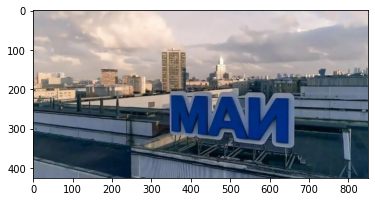

In [17]:
from PIL import Image
import PIL as pil
img = Image.open('../data/mai.jpg')
plt.imshow(img)

Создание миниатюр

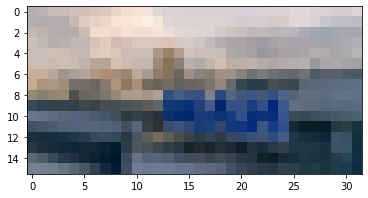

In [18]:
img2=img.copy()
img2.thumbnail((32,32))
plt.imshow(img2)
del img2

Копиование и вставка областей

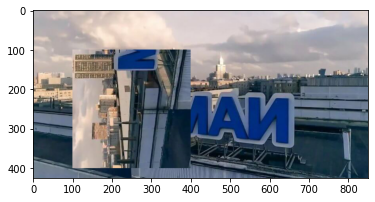

In [19]:
img3 = img.copy()
box = (100,100,400,400)
region=img3.crop(box)
region=region.transpose(Image.ROTATE_90)
img3.paste(region,box)
plt.imshow(img3)

Рисование точек и прямых линий

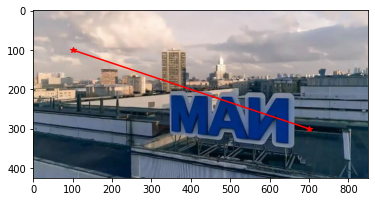

In [20]:
x=np.array([100,700])
y=np.array([100,300])
plt.imshow(img)
plt.plot(x,y,'r-*')

Гистограмма и черно-белое

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


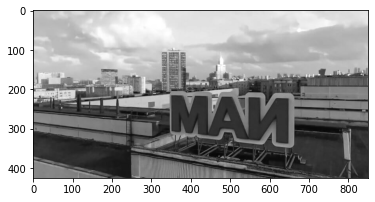

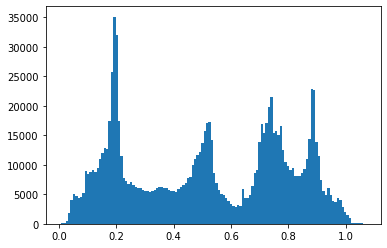

In [21]:
arr = np.array(img)/255.0
gray = arr.copy()
gray[:,:,:]=((gray*np.array([0.299,0.587,0.184])).sum(axis=2))[:,:,np.newaxis]
plt.imshow(gray)
plt.show()
plt.hist(gray.flatten(),128)
plt.show()

Вырванивание гистограммы

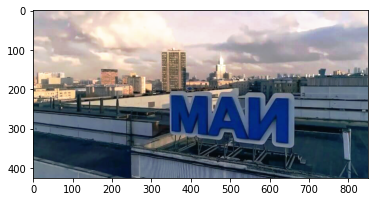

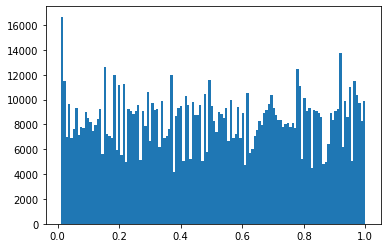

In [22]:
def histeq(arr,n_bins=256):
    imhist,bins = np.histogram(arr,n_bins)
    cdf = imhist.cumsum()
    cdf = cdf/cdf[-1]
    im2=np.interp(arr.flatten(),bins[:-1],cdf)
    return im2.reshape(arr.shape),cdf
shrek3 = histeq(arr)[0]
plt.imshow(shrek3)
plt.show()
plt.hist(shrek3.flatten(),128)
del shrek3

Усреднение изображений

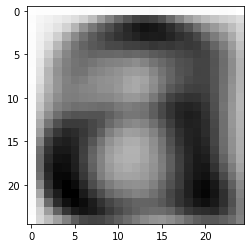

In [23]:
def compute_avg(imlist):
    all = np.zeros(imlist[0].shape,dtype=np.float64)
    for i in range(len(imlist)):
        all+=imlist[i]
    all/=len(imlist)
    return all
import os
path='../data/fontimages/'
paths =os.listdir(path)
imlist = []
for i in range(len(paths)):
    imlist.append(np.array(Image.open(path+paths[i])))
plt.imshow(compute_avg(imlist),cmap='gray')

Метод главных компонент для изображений

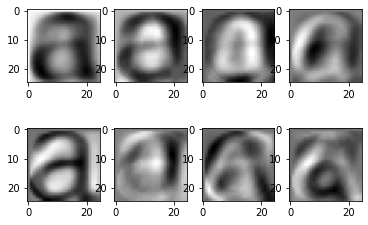

In [24]:
def pca(x):
    num_data,dim=x.shape
    mean_x=x.mean(axis=0)
    x=x-mean_x
    if dim>num_data:
        m = np.dot(x,x.T)
        e,EV=np.linalg.eig(m)
        tmp = np.dot(x.T,EV)
        v = tmp[::-1]
        s = np.sqrt(e)[::-1]
        for i in range(v.shape[1]):
            v[:,i]=s
    else:
        u,s,v = np.linalg.svd(x)
        v=v[:num_data]
    return v,s,mean_x

im=imlist[0]
m,n=im.shape
imnbr=len(imlist)

immatrix = np.array([i.flatten() for i in imlist])
v,s,immean=pca(immatrix)
plt.subplot(2,4,1)
plt.imshow(immean.reshape(m,n),cmap='gray')
for i in range(7):
    plt.subplot(2,4,i+2)
    plt.imshow(v[i].reshape((m,n)),cmap='gray')

SciPy. Размытие изображений

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


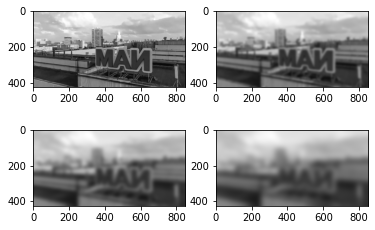

In [25]:
plt.imshow(gray)
plt.subplot(2,2,1)
plt.imshow(gray,cmap='gray')
for i in range(1,4):
    plt.subplot(2,2,i+1)
    plt.imshow(sp.ndimage.filters.gaussian_filter(gray,5*i),cmap='gray')

SciPy. Оператор собеля

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


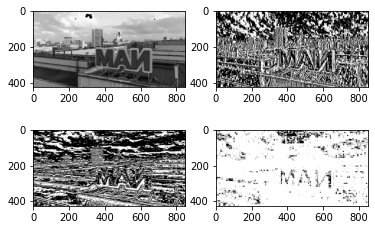

In [26]:
gray=(gray*255).astype(np.uint8)
imx=np.zeros(gray.shape)
sp.ndimage.filters.sobel(gray,1,imx)
imy=np.zeros(gray.shape)
sp.ndimage.filters.sobel(gray,0,imy)
magnutide=np.sqrt(imx**2+imy**2)
plt.subplot(2,2,1)
plt.imshow(gray)
plt.subplot(2,2,2)
plt.imshow(imx,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(imy,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(magnutide,cmap='gray')

SciPy. Фильтр Гаусса

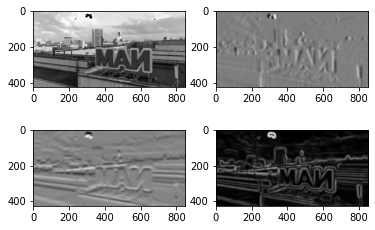

In [27]:
gray2=gray[:,:,0]
sigma=5
imx=np.zeros(gray2.shape)
sp.ndimage.filters.gaussian_filter(gray2,(sigma,sigma),(0,1),imx)
imy=np.zeros(gray2.shape)
sp.ndimage.filters.gaussian_filter(gray2,(sigma,sigma),(1,0),imy)
magnutide=np.sqrt(imx**2+imy**2)
plt.subplot(2,2,1)
plt.imshow(gray2,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(imx,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(imy,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(magnutide,cmap='gray')

SciPy. Морфлогия - подсчет объектов

Кол-во объектов 45
Кол-во объектов 30


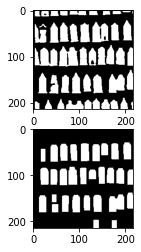

In [28]:
im = np.array(Image.open('../data/house.png').convert('L'))
im=1*(im<128)

labels,nbr_objects=sp.ndimage.measurements.label(im)
print(f'Кол-во объектов {nbr_objects}')

im_open =sp.ndimage.morphology.binary_opening(im,np.ones((9,5)),iterations=2)
labels_open,nbr_objects_open=sp.ndimage.measurements.label(im_open)
print(f'Кол-во объектов {nbr_objects_open}')
plt.subplot(2,1,1)
plt.imshow(im,cmap='gray')
plt.subplot(2,1,2)
plt.imshow(im_open,cmap='gray')

SciPy. Очистка изображения от шумов

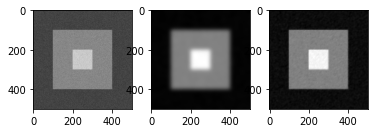

In [29]:
def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):

    m,n = im.shape

    U = U_init
    Px = im
    Py = im
    error = 1

    while (error > tolerance):
        Uold = U


        GradUx = np.roll(U,-1,axis=1)-U
        GradUy = np.roll(U,-1,axis=0)-U

        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = np.maximum(1,np.sqrt(PxNew**2+PyNew**2))

        Px = PxNew/NormNew
        Py = PyNew/NormNew


        RxPx = np.roll(Px,1,axis=1)
        RyPy = np.roll(Py,1,axis=0)

        DivP = (Px-RxPx)+(Py-RyPy)
        U = im + tv_weight*DivP

        error = np.linalg.norm(U-Uold)/np.sqrt(n*m)

    return U,im-U

im = np.zeros((500,500))
im[100:400,100:400]=128
im[200:300,200:300]=255
im = im+30*np.random.normal(0,1,im.shape)
u,t=denoise(im,im)
g=sp.ndimage.filters.gaussian_filter(im,10)
plt.subplot(1,3,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(u,cmap='gray')

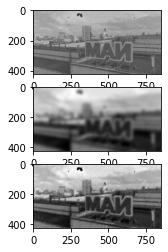

In [30]:
im = gray[:,:,0]+30*np.random.normal(0,1,gray[:,:,0].shape)
u,t=denoise(im,im)
g=sp.ndimage.filters.gaussian_filter(im,10)
plt.subplot(3,1,1)
plt.imshow(im,cmap='gray')
plt.subplot(3,1,2)
plt.imshow(g,cmap='gray')
plt.subplot(3,1,3)
plt.imshow(u,cmap='gray')